# Liam Patterson
#### Lab Final Activity

In [24]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [25]:
data = ascii.read('lab_final_data.txt', 'r')
data

Dist,Vel
int32,int32
15,1100
97,6700
32,2400
145,10700
50,3100
122,9900
58,4300
91,5300
120,9000


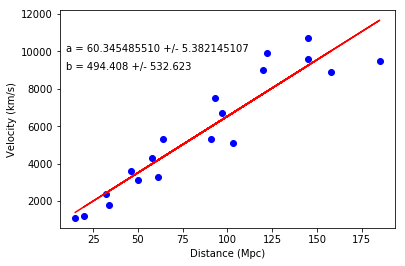

60.3454855101 km/s / Mpc - Hubble's Constant, H_0
Since Hubble's law states v = H_0 d, the slope of the v vs d graph (v/d) must equal H_0


In [38]:
data = ascii.read('lab_final_data.txt', 'r')

#defining variables and function
y_vel = data['Vel']
x_dist = data['Dist']

def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, x_dist, y_vel)

#plotting
plt.plot(x_dist, y_vel, 'bo')
plt.plot(x_dist, np.polyval(popt, x_dist), 'r')
plt.text(10, 10000, r"a = {0:.9f} +/- {1:.9f}".format(popt[0], pcov[0,0]**0.5))
plt.text(10, 9000, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.show()

print(popt[0], "km/s / Mpc - Hubble's Constant, H_0")
print("Since Hubble's law states v = H_0 d, the slope of the v vs d graph (v/d) must equal H_0")

In [36]:
H = popt[0] * 3.2408e-20 #Converting Mpc to km which cancels out the unit for distance which leaves 1/s

age_s= 1/H #Finding age of universe
age_years = age_s * 3.17098e-8 #Converting seconds to years

print(H, "1/s - Hubble's constant without distance untis")
print(age_years, "years - Age of Universe found with Hubble's constant")

1.95567649441e-18 1/s - Hubble's constant without distance untis
16214235887.5 years - Age of Universe found with Hubble's constant
